# Support Vector Machine Classification

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Loading Data

In [ ]:
# 80/20 split
X_train = np.load('data/X_train_s.npy')   # X values have been standardized
X_test = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

In [ ]:
X_train.shape

In [ ]:
X_test.shape

# attempted PCA, but dimesnsionality was not reduced significantly. 

In [6]:
# PCA
# determining the number of components needed 
from sklearn import decomposition
def optimizePCA(data,n,desiredR2):
    """Takes the dataset, n number of components to test, and the desired r2.
    Prints the r2 results for range n.
    Returns the minimal number of components for the desired r2, 
    as well as the transformed data"""
    
    r = 0  # number of components
    pcaResult = []
    for i in range(n):
        pca = decomposition.PCA(n_components=i) # running pca for i components
        transformed = pca.fit_transform(data)  
        r2 = pca.explained_variance_ratio_      # variance by component
        totalr2 = sum(r2)                       # sum of variance explained
        print("nComponents: ",i,"    |      Explained Variance: ",totalr2)
        
        # stopping once we explain the desired level of variance
        if totalr2 >= desiredR2:
            r=i
            pcaResult = transformed
            break

    return r,pcaResult

In [7]:
r,X_trainPCA = optimizePCA(X_train,27,.99)
r,X_testPCA = optimizePCA(X_test,27,.99)

nComponents:  0     |      Explained Variance:  0
nComponents:  1     |      Explained Variance:  0.16965322899759558
nComponents:  2     |      Explained Variance:  0.2807725659367573
nComponents:  3     |      Explained Variance:  0.3682897158687888
nComponents:  4     |      Explained Variance:  0.45467978148253846
nComponents:  5     |      Explained Variance:  0.5348040026393424
nComponents:  6     |      Explained Variance:  0.6075522310776325
nComponents:  7     |      Explained Variance:  0.6798267905836252
nComponents:  8     |      Explained Variance:  0.7227119651064207
nComponents:  9     |      Explained Variance:  0.7598469121550655
nComponents:  10     |      Explained Variance:  0.7958838672970909
nComponents:  11     |      Explained Variance:  0.8276429628154544
nComponents:  12     |      Explained Variance:  0.8533787839205399
nComponents:  13     |      Explained Variance:  0.8758257494095819
nComponents:  14     |      Explained Variance:  0.896120763329649
nCompo

# SVM Models

In [15]:
# Grid search computation time was extremely long, even with PCA.
# Decided to experiment with varying kernels and some regularization parameters.
clf = SVC(kernel='linear')
clf1 = SVC(kernel='poly')
clf2 = SVC(kernel='rbf')
clf3 = SVC(kernel='rbf',C=0.01,gamma=0.01)
clf4 = SVC(kernel='rbf',C=.9,gamma=.9)

# Evaluation

In [8]:
>>> from sklearn import datasets, linear_model,metrics
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import make_scorer
>>> from sklearn.metrics import confusion_matrix, accuracy_score,precision_recall_curve
import seaborn as sns

def fit_predict_score(clf):
    """Predicts the average accuracy score of a classifier clf and outputs a confusion matrix."""
    clf.fit(X_train, np.ravel(y_train)) # fitting the model to the training data
    predicted = clf.predict(X_test) #getting predicted values
    
    #cross tabulation of predicted and actual values produces the correlation matrix
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),4)
    plt.title(clf , fontsize = 12)
    plt.suptitle("Confusion Matrix")
    plt.show()
    print("Accuracy Score: ",accuracy)
    print (metrics.classification_report(y_test,predicted))
    
def roccurve(clf):
# crea`ting roc curve
    predicted = clf.predict(X_test) #getting y hat
    fpr,tpr,_ = metrics.roc_curve(y_test,predicted)  #comparing y hat and the actuall y 
    #plotting
    plt.title('ROC Curve')
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def prcurve(clf):
    predicted = clf.predict(X_test)
    precision,recall,_ = precision_recall_curve(y_test,predicted)
    #plotting
    plt.plot(recall,precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision Recall Curve")
    plt.show()
    
def metrics_report(model):
        fit_predict_score(model)
        roccurve(model)
        prcurve(model)

### The rbf kernel had the best performance, with an accuracy score of 95.6%

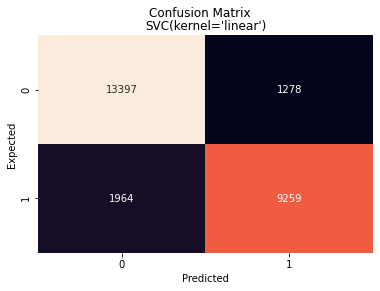

Accuracy Score:  0.8748
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14675
           1       0.88      0.83      0.85     11223

    accuracy                           0.87     25898
   macro avg       0.88      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898



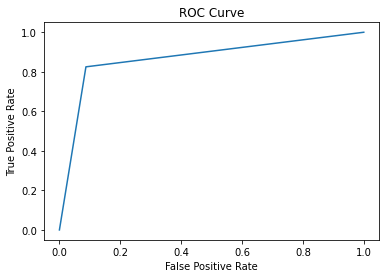

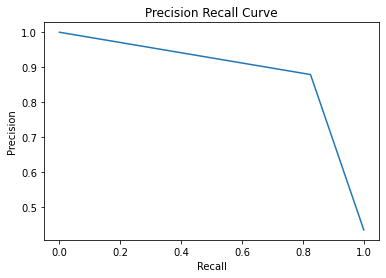

In [9]:
# Linear Kernel
metrics_report(clf)

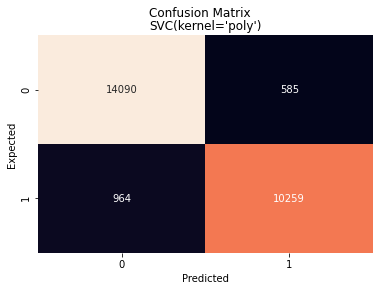

Accuracy Score:  0.9402
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14675
           1       0.95      0.91      0.93     11223

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



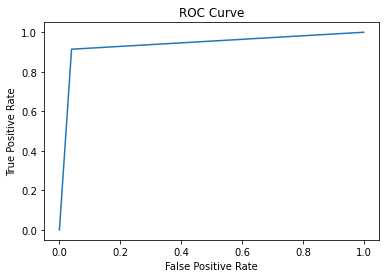

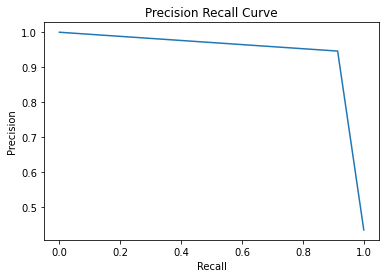

In [10]:
# Polynomial Kernel
metrics_report(clf1)

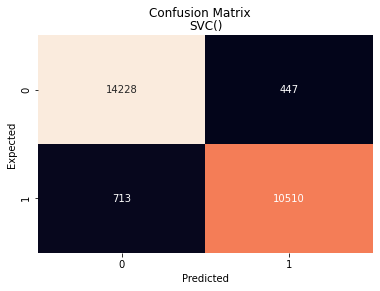

Accuracy Score:  0.9552
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14675
           1       0.96      0.94      0.95     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.95      0.95     25898
weighted avg       0.96      0.96      0.96     25898



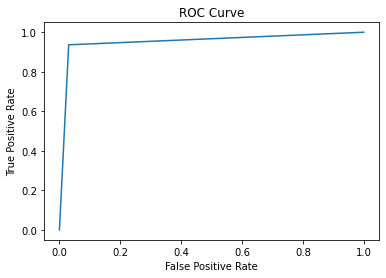

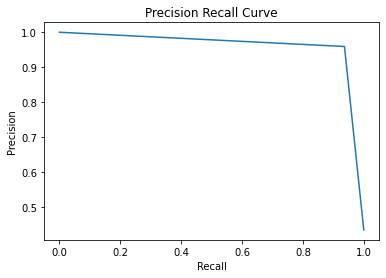

In [11]:
# RBF Radial Basis Function Kernel 
metrics_report(clf2)

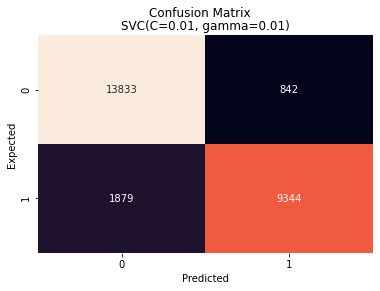

Accuracy Score:  0.8949
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     14675
           1       0.92      0.83      0.87     11223

    accuracy                           0.89     25898
   macro avg       0.90      0.89      0.89     25898
weighted avg       0.90      0.89      0.89     25898



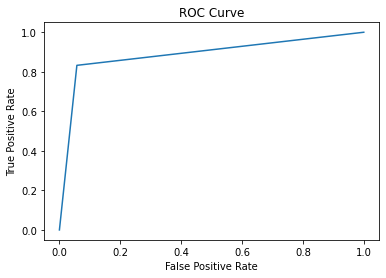

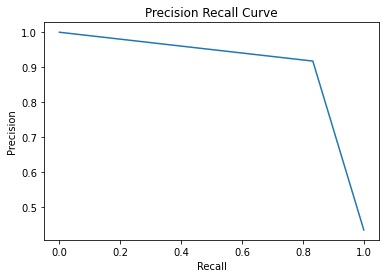

In [14]:
# RBF with some regularization
metrics_report(clf3)

In [ ]:
# Second regularization attempt
metrics_report(clf4)